In [1]:
import pandas as pd
from pathlib import Path
import json
from tqdm.rich import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator, ScalarFormatter
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import skew, kurtosis

colors = ["#F0741E", "#276CB3"]

plt.style.use("seaborn-v0_8-paper")

save_path=Path("./plots")
save_path.mkdir(exist_ok=True, parents=True)

In [2]:
df_reference = pd.read_csv(Path("./dataset_sorted.csv"))
names = [f.stem[:-4] for f in Path("/home/tom/git_workspace/tesi/GrapheNetDefectDetector/data_tesi_new/xyz_files").iterdir() if f.suffix.lower() ==".xyz"]

df_reference = df_reference.loc[df_reference["file_name"].isin(names)]

In [3]:
print(len(df_reference))

12852


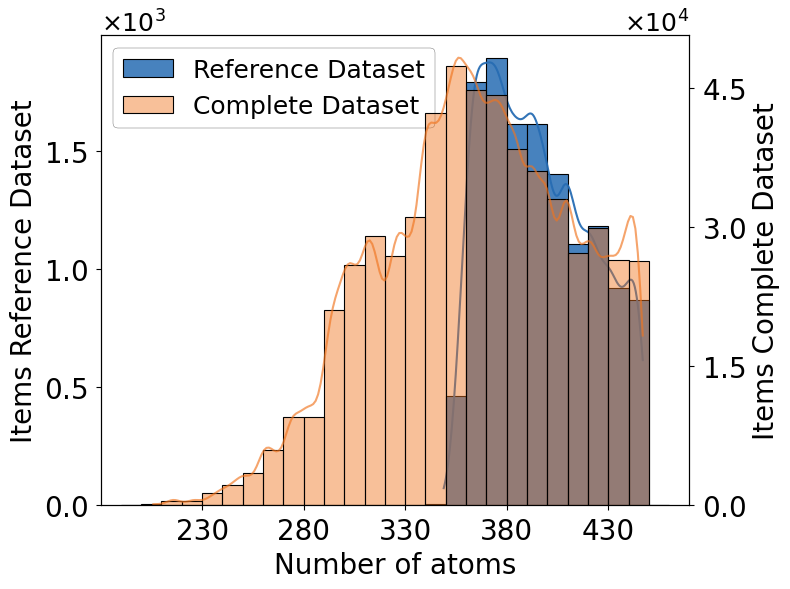

In [4]:
df = pd.read_csv("./dataset_complete_with_atoms_count.csv")

min_value = 190 #df["n_atoms"].min()
max_value = 460 #df["n_atoms"].max()
binwidth = 10
bins = np.arange(min_value, max_value + binwidth, binwidth)


fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
sns.histplot(data=df_reference, x="initial_num_atoms", ax=ax1, bins=bins, kde=True, label='Reference Dataset', color=colors[1], stat='count',linewidth=0.8, alpha=0.85, line_kws={'alpha':0.95,"linewidth":1.5})
sns.histplot(data=df, x="n_atoms", ax=ax2, bins=bins, kde=True, label='Complete Dataset', color=colors[0], stat='count',linewidth=0.8, alpha=0.45, line_kws={'alpha':0.65,"linewidth":1.5})

# Sincronizza i limiti degli assi
ax1.set_xlim([min_value-binwidth, max_value+binwidth])
ax2.set_xlim([min_value-binwidth, max_value+binwidth])

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
# Ingrandisci la notazione esponenziale sull'asse y1
ax1.yaxis.get_offset_text().set_fontsize(18)  # Modifica la dimensione del font per l'offset
# Ingrandisci la notazione esponenziale sull'asse y2
ax2.yaxis.get_offset_text().set_fontsize(18)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2  # Combina le linee di entrambe le legende
labels = labels1 + labels2  # Combina le etichette
#ax1.legend(lines1, labels1, loc='upper left', fontsize=18, edgecolor='black',bbox_to_anchor=(0, 1))
#ax2.legend(lines2, labels2, loc='upper left', fontsize=18, edgecolor='black',bbox_to_anchor=(0, 0.9))
ax1.legend(lines, labels, loc='upper left', fontsize=18, edgecolor='black', ncol=1)
ax1.tick_params(axis="both", which="major", labelsize=20)
ax2.tick_params(axis="both", which="major", labelsize=20)
ax1.set_xlabel("Number of atoms",size=20)
ax1.set_ylabel('Items Reference Dataset',size=20)
ax2.set_ylabel('Items Complete Dataset',size=20)
ax1.set_xticks((230,280,330,380,430))
#ax1.set_xticks((250,300,350,400))
#ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=4))
plt.tight_layout()
fig.savefig(save_path.joinpath(f"distribution_n_atoms_overlap_datasets.png"),dpi=300,bbox_inches="tight")
plt.show()
plt.close()